# Real estate dataset using other techniques of ML using
In this notebook, we will use the real estate dataset to predict the price of a house.
But we will use other techniques of ML to predict the price of a house.
We will use the following techniques:
decision tree in random forest and Artificial Neural Network.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

## Decision Tree Regressor and Random Forest Regressor

In [2]:
# load the dataset
df = pd.read_csv('dataset/Realstate.csv')
df.head()

,SalePrice,Size,Beds,Baths,Num_Garage,Year,Highway,Aircondition,SwimmingPool
0,360.0,3.032,4,4,2,1972,no,yes,no
1,340.0,2.058,4,2,2,1976,no,yes,no
2,250.0,1.780,4,3,2,1980,no,yes,no
3,205.5,1.638,4,2,2,1963,no,yes,no
4,275.5,2.196,4,3,2,1968,no,yes,no


In [3]:
#transform the yes/no column into 1/0
df.Highway.replace(('yes', 'no'), (1, 0), inplace=True)
df.Aircondition.replace(('yes', 'no'), (1, 0), inplace=True)
df.SwimmingPool.replace(('yes', 'no'), (1, 0), inplace=True)
df.head()

,SalePrice,Size,Beds,Baths,Num_Garage,Year,Highway,Aircondition,SwimmingPool
0,360.0,3.032,4,4,2,1972,0,1,0
1,340.0,2.058,4,2,2,1976,0,1,0
2,250.0,1.780,4,3,2,1980,0,1,0
3,205.5,1.638,4,2,2,1963,0,1,0
4,275.5,2.196,4,3,2,1968,0,1,0


In [4]:
#define features and target
features = df[['Size', 'Highway']]
target = df['SalePrice']

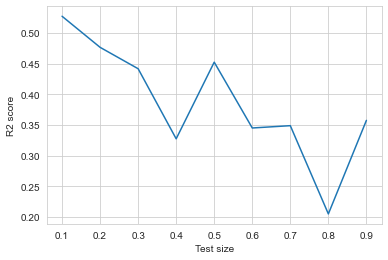

In [5]:
#plot the rsquared values in function of the test size
test_size = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
r2_values = []
for i in test_size:
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=i)
    regressor = DecisionTreeRegressor()
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    r2_values.append(r2_score(y_test, y_pred))

plt.plot(test_size, r2_values)
plt.xlabel('Test size')
plt.ylabel('R2 score')
plt.show()

In [6]:
#initialize the train set and test set using test size = 0.4
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

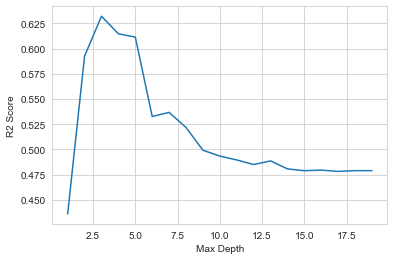

In [7]:
#initialize the tree regressor model

regressor = DecisionTreeRegressor(random_state=0)

#Loop over a range of different maximum depths
r2_score_list = []
for max_depth in range(1, 20):
    regressor.set_params(max_depth=max_depth)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    r2_score_list.append(r2_score(y_test, y_pred))

#plot the results
plt.plot(range(1, 20), r2_score_list)
plt.xlabel('Max Depth')
plt.ylabel('R2 Score')
plt.show()

In [8]:
#initialize the tree regressor model with max_depth = 5
regressor = DecisionTreeRegressor(random_state=0, max_depth=4)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
r2_score(y_test, y_pred)
print('The best R2 scrore with a random forest is:',r2_score(y_test, y_pred))

The best R2 scrore with a random forest is: 0.6147365007590775


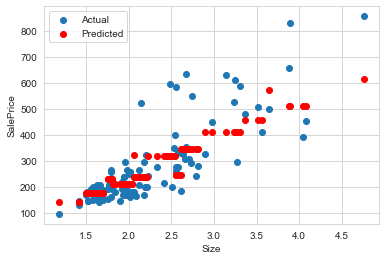

In [9]:
#plot the actual vs predicted
plt.scatter(X_test['Size'], y_test)
plt.scatter(X_test['Size'], y_pred, color='red')
plt.xlabel('Size')
plt.legend(['Actual', 'Predicted'])
plt.ylabel('SalePrice')
plt.show()

## ANN Regressor

In [10]:
# Importing the dataset
import pandas as pd
dataset = pd.read_csv('dataset/Realstate.csv')
dataset.head()

# replace yes with 1 and no with 0
dataset.Highway.replace(('yes', 'no'), (1, 0), inplace=True)
dataset.Aircondition.replace(('yes', 'no'), (1, 0), inplace=True)
dataset.SwimmingPool.replace(('yes', 'no'), (1, 0), inplace=True)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
# create the ANN
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(units=6, kernel_initializer='uniform', activation='relu', input_dim=8))
model.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))
model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=10, epochs=100)


Init Plugin
Init Graph Optimizer
Init Kernel
Metal device set to: Apple M1


2022-04-26 14:26:39.316214: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-26 14:26:39.316336: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-04-26 14:26:39.496162: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-04-26 14:26:39.498730: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/100


2022-04-26 14:26:45.960334: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


42/42 [==============================] - 8s 6ms/step - loss: 0.6878 - accuracy: 0.8490
Epoch 2/100
42/42 [==============================] - 0s 6ms/step - loss: 0.6595 - accuracy: 0.9465
Epoch 3/100
42/42 [==============================] - 0s 6ms/step - loss: 0.6017 - accuracy: 0.9532
Epoch 4/100
42/42 [==============================] - 0s 6ms/step - loss: 0.5030 - accuracy: 0.9429
Epoch 5/100
42/42 [==============================] - 0s 6ms/step - loss: 0.3854 - accuracy: 0.9393
Epoch 6/100
42/42 [==============================] - 0s 6ms/step - loss: 0.3012 - accuracy: 0.9357
Epoch 7/100
42/42 [==============================] - 0s 6ms/step - loss: 0.2748 - accuracy: 0.9286
Epoch 8/100
42/42 [==============================] - 0s 6ms/step - loss: 0.2388 - accuracy: 0.9381
Epoch 9/100
42/42 [==============================] - 0s 6ms/step - loss: 0.1833 - accuracy: 0.9580
Epoch 10/100
42/42 [==============================] - 0s 7ms/step - loss: 0.2534 - accuracy: 0.9241
Epoch 11/100
42/42 [=

In [13]:
# Predicting the Test set results
y_pred = model.predict(X_test)

#print the accuracy
print('Accuracy of ANN is: ', model.evaluate(X_test, y_test)[1])

2022-04-26 14:27:12.527332: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 0s 9ms/step - loss: 0.3666 - accuracy: 0.8952
Accuracy of ANN is:  0.8952381014823914


2022-04-26 14:27:12.731577: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


## Conclusion

The linear regression achieves at its best 0.937 accuracy at its best.
The RF regressor achieves 0.633 accuracy at its best.
The ANN achieves 0.895 accuracy at its best.

The simplest technic looks like precise. The Linear model is the most accurate.
But the ANN allow to use every variable in the model without the ranking of combinations.

There is a lot of combinations that can be used in the model. Thus, the ANN is the most robust technic.